In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageSequence
import librosa
import soundfile as sf

img = Image.open('flag.gif')
frames = np.array([np.array(frame.copy().convert('RGB').getdata(),dtype=np.uint8).reshape(frame.size[1],frame.size[0],3) for frame in ImageSequence.Iterator(img)])

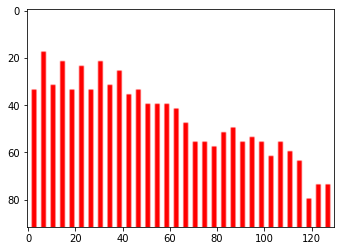

In [2]:
plt.imshow(frames[100])

In [3]:
num_freqs = 32
quantize = 2
min_db = -60
max_db = 30
fft_window_size = 2048
frame_step_size = 512
window_function_type = 'hann'
red_pixel = [255, 0, 0]
white_pixel = [255, 255, 255]
dblist = list(range(-60, 31, 2))
sample_rate = 22050

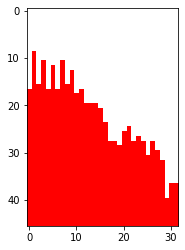

In [4]:
plt.imshow(frames[100][::2,::2,::1][:,1:64:2,:])

In [5]:
dmel = list()
for frame in frames:
    nframe = frame[::2,::2,::1][:,1:64:2,:]
    nflst  = list()
    for nfreq in range(32):
        nfsdb = np.sum([0 if np.sum(nframe[tdb][nfreq]) == 255*3 else 1 for tdb in range(46)])
        nfmdb = dblist[nfsdb]
        nflst.append(nfmdb)
    dmel.append(nflst)

In [6]:
fmx = np.array([np.array(dframe).transpose() for dframe in dmel], dtype='float32').transpose()

In [7]:
fmx

array([[-60., -60., -60., ..., -36., -42., -54.],
       [-60., -60., -60., ..., -46., -56., -60.],
       [-60., -60., -60., ..., -50., -56., -60.],
       ...,
       [-60., -60., -60., ..., -60., -60., -60.],
       [-60., -60., -60., ..., -60., -60., -60.],
       [-60., -60., -60., ..., -60., -60., -60.]], dtype=float32)

In [8]:
fsd = librosa.griffinlim(librosa.feature.inverse.mel_to_stft(
    M=librosa.db_to_power(fmx),
    sr=sample_rate
))

In [10]:
sf.write('flag.wav', fsd, sample_rate)